In [39]:
#Uploading the dataset
import pandas as pd
dataset = pd.read_csv("dataset.csv")

In [40]:
#Q.N0 1) Handling Missing Values
#IN NUMERICAL COLUMNS MISSING VALUES ARE REPLACED WITH MEDIAN
#IN CATEGORICAL COLUMNS MISSING VALUES ARE REPLACED WITH SEPARATE CATEGORY CALLED "UNKNOWN"
#FINALLY, CLEANED DATASET IS DISPLAYED
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in num_cols:
    dataset[col].fillna(dataset[col].median(), inplace=True)
dataset['sex'].fillna('unknown', inplace=True)
cat_cols = ['species', 'island', 'sex']
for col in cat_cols:
    dataset[col] = dataset[col].astype('category')
print("Cleaned dataset:")
print(dataset.info())
print(dataset.isnull().sum())

Cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     344 non-null    float64 
 3   bill_depth_mm      344 non-null    float64 
 4   flipper_length_mm  344 non-null    float64 
 5   body_mass_g        344 non-null    float64 
 6   sex                344 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB
None
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [41]:
# Q.NO 2) Calculating average body mass for Gentoo species of penguins
#AVERAGE OF BODY MASS OF GENTOO PENGUINS IS FOUND USING THE FUNCTION mean()
gentoo_penguins = dataset[dataset['species'] == 'Gentoo']
average_body_mass_gentoo = gentoo_penguins['body_mass_g'].mean()
print(f"Average body mass for Gentoo penguins: {average_body_mass_gentoo:.2f}")

Average body mass for Gentoo penguins: 5125.00


     species         feature  skewness  kurtosis
0     Adelie  bill_length_mm  0.166475 -0.224485
1     Adelie   bill_depth_mm  0.329567 -0.096039
2     Gentoo  bill_length_mm  0.720893  1.177040
3     Gentoo   bill_depth_mm  0.346413 -0.584449
4  Chinstrap  bill_length_mm -0.093203 -0.119069
5  Chinstrap   bill_depth_mm  0.006726 -0.898740


<Figure size 1200x600 with 0 Axes>

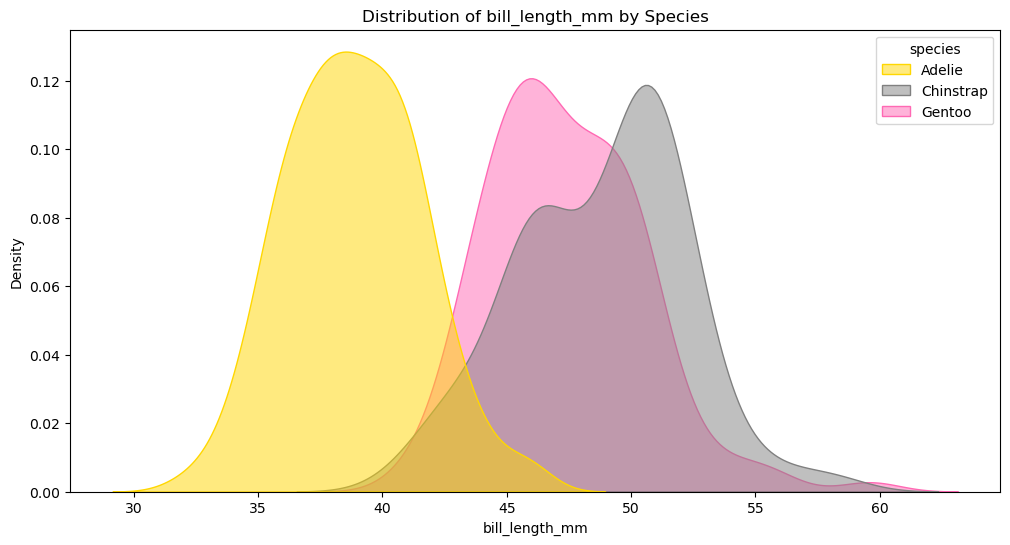

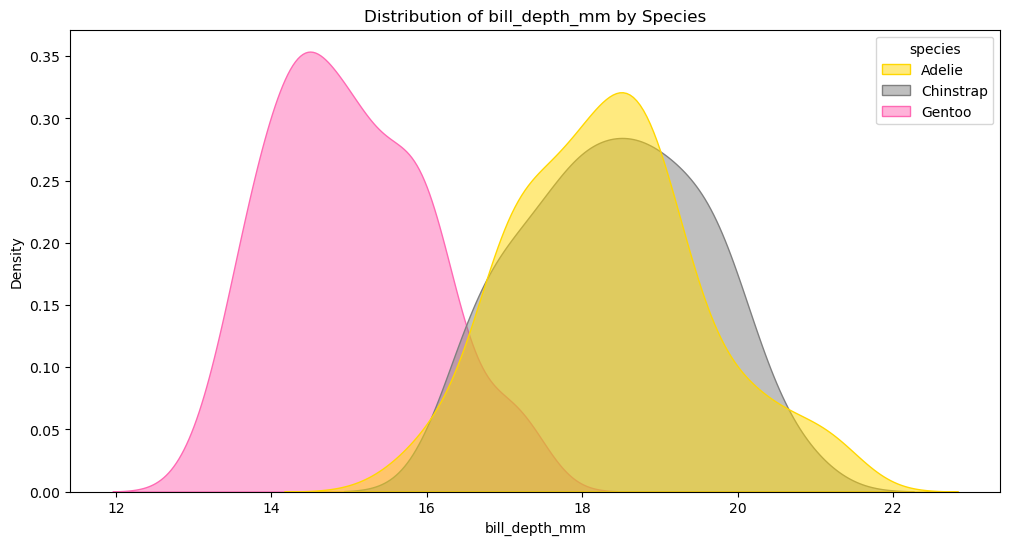

In [42]:
# Q.NO 3) Calculating skewness and kurtosis for each species and feature
#TO MEASURE THE ASYMMETRY OF THE DISTRIBUTION, THE FUNCTION skew(data) IS USED.SKEWNESS OF 0 INDICATES PERFECTY SYMMETRICAL DISTRIBUTION
#TO MEASURE THE TAILEDNESS OF THE DISTRIBUTION, THE FUNTION kurtosis(data) IS USED.A KURTOSIS VALUE NEAR 3 INDICATES A NORMAL DISTRIBUTION
#THEN STATISTICS IN A DATAFRAME IS DISPLAYED AND THE DISTRIBUTION IS VISUALIZED USING KERNEL DENSITY ESTIMATE
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
species_list = dataset['species'].unique()
stats = {'species': [], 'feature': [], 'skewness': [], 'kurtosis': []}
for species in species_list:
    for feature in ['bill_length_mm', 'bill_depth_mm']:
        data = dataset[dataset['species'] == species][feature].dropna()
        stats['species'].append(species)
        stats['feature'].append(feature)
        stats['skewness'].append(skew(data))
        stats['kurtosis'].append(kurtosis(data))
stats_df = pd.DataFrame(stats)
print(stats_df)
plt.figure(figsize=(12, 6))
custom_palette = ['#FFD700', '#808080', '#FF69B4']
for feature in ['bill_length_mm', 'bill_depth_mm']:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=dataset, x=feature, hue='species', fill=True, common_norm=False, alpha=0.5, palette=custom_palette)
    plt.title(f"Distribution of {feature} by Species")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

bill_length_mm: 0 outliers detected


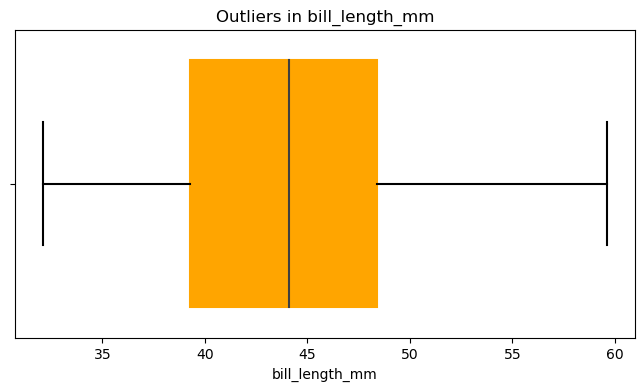

bill_depth_mm: 0 outliers detected


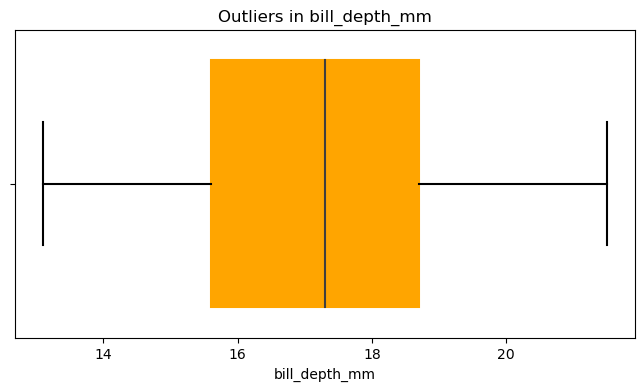

flipper_length_mm: 0 outliers detected


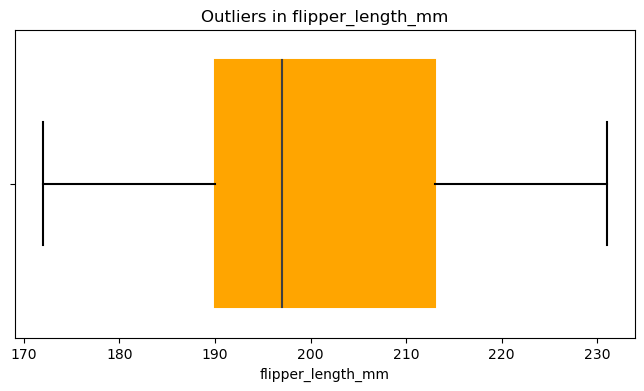

body_mass_g: 3 outliers detected


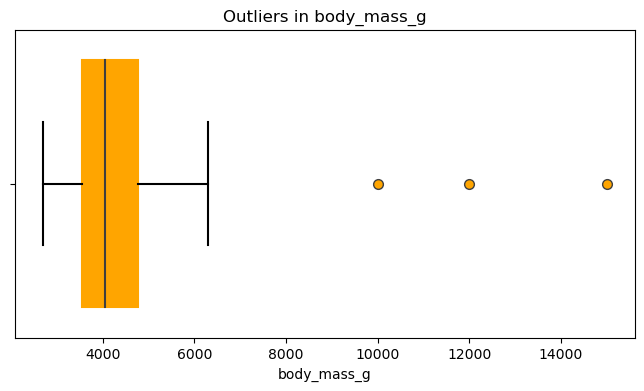

In [43]:
# Q.NO 4) Detecting outliers using Interquantile Range(IQR)
#Q1:25TH PERCENTILE, Q3:75TH PERCENTILE,IQR:DIFFERENCE BETWEEN Q3 AND Q1
#OUTLIERS ARE VALUES LESS THAN Q1-1.5*IQR OR GREATER THAN Q3+1.5*IQR
#VISUALIZATION IS DONE USING BOXPLOT
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
for col in numerical_cols:
    outliers = detect_outliers_iqr(dataset, col)
    print(f"{col}: {len(outliers)} outliers detected")
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=dataset, x=col,boxprops=dict(facecolor='orange', color='orange'),whiskerprops=dict(color='black'), capprops=dict(color='black'),flierprops=dict(markerfacecolor='orange', marker='o', markersize=7))
    plt.title(f"Outliers in {col}")
    plt.show()

In [44]:
# Q.NO 5) The curse of dimensionality refers to the challenges posed by high-dimensional data, such as sparsity, overfitting, and increased computational costs. While this dataset has only seven columns, it does not inherently suffer from the curse of dimensionality unless the number of features is disproportionately large compared to the number of samples.There is significant redundancy or correlation among features.

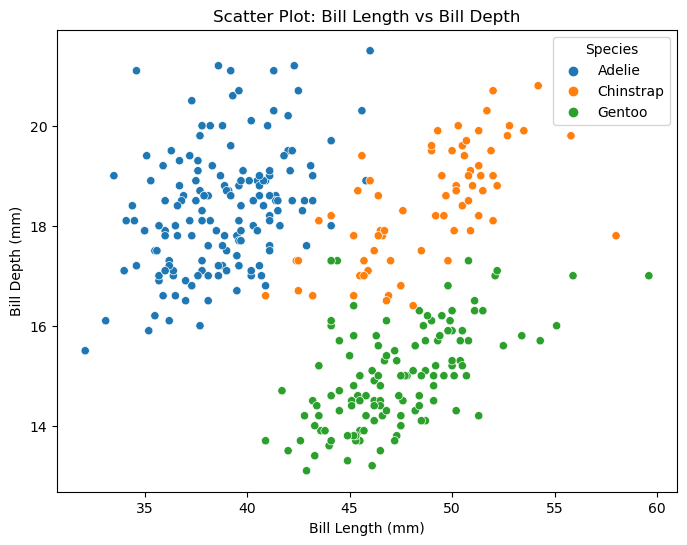

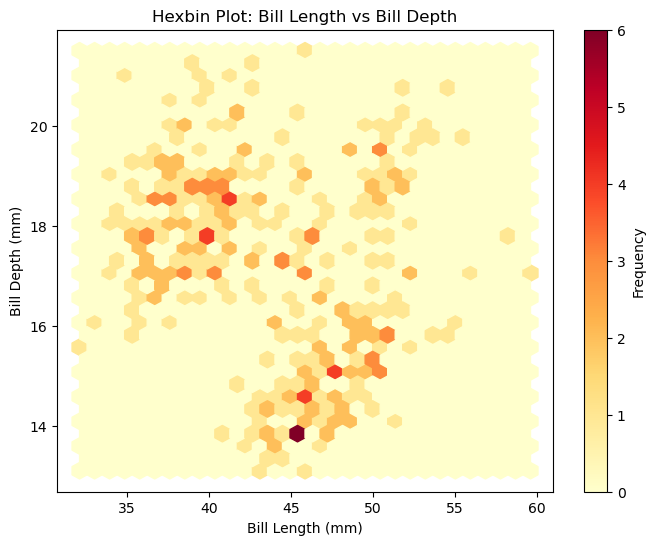

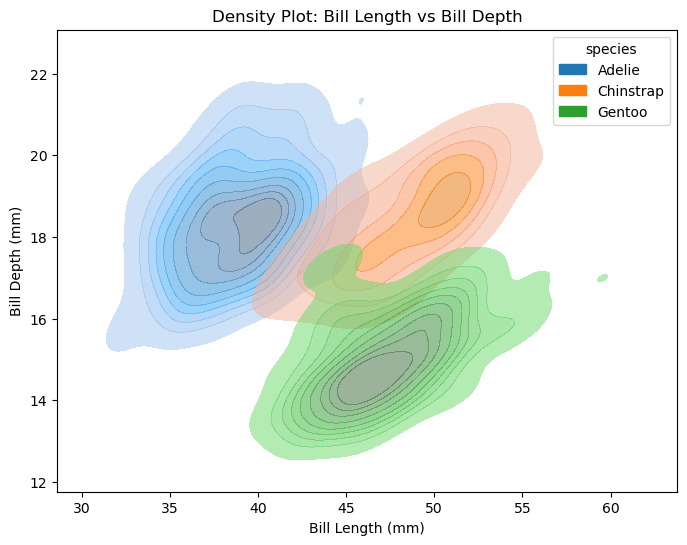

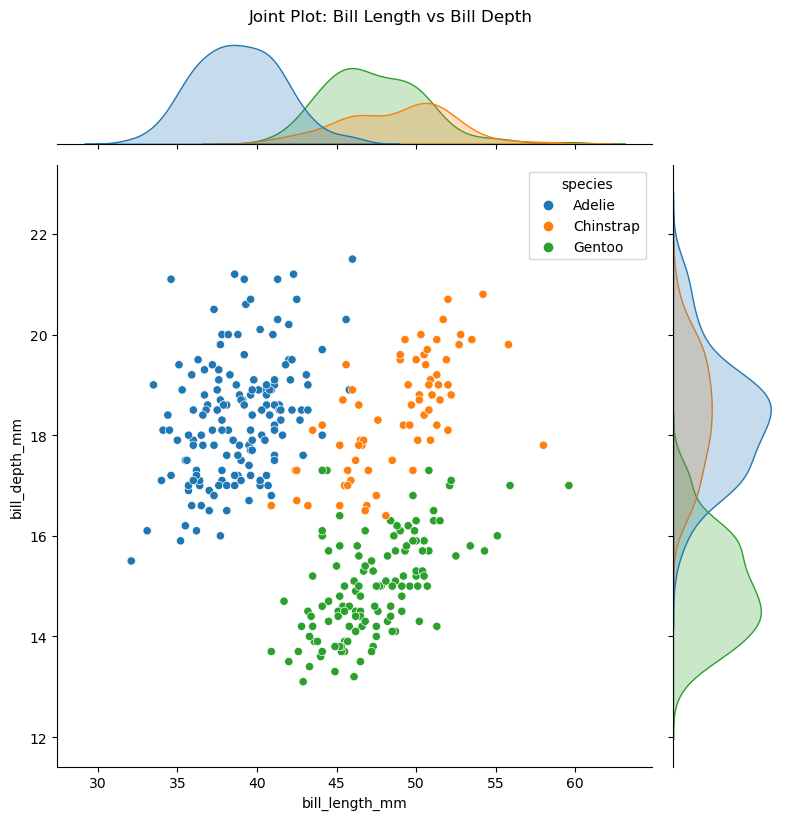

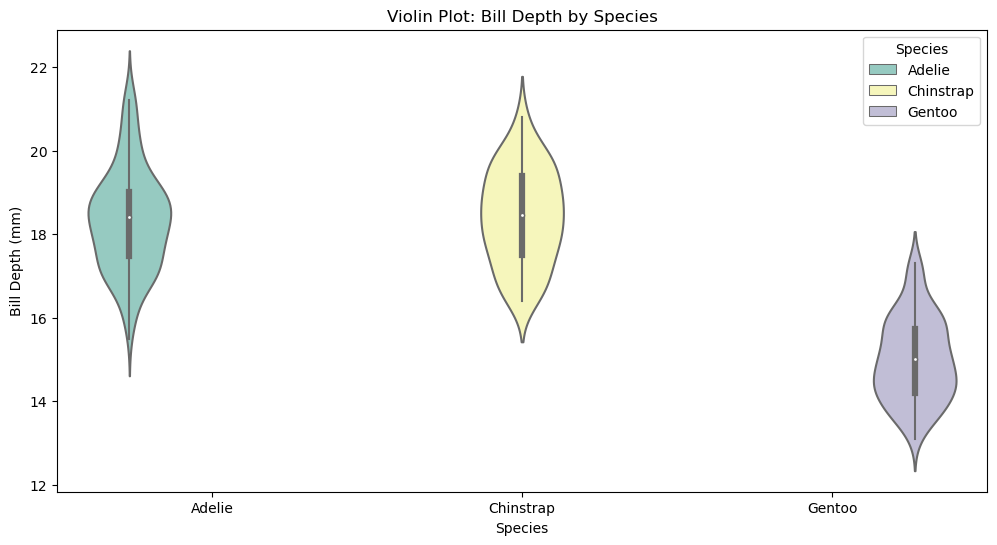

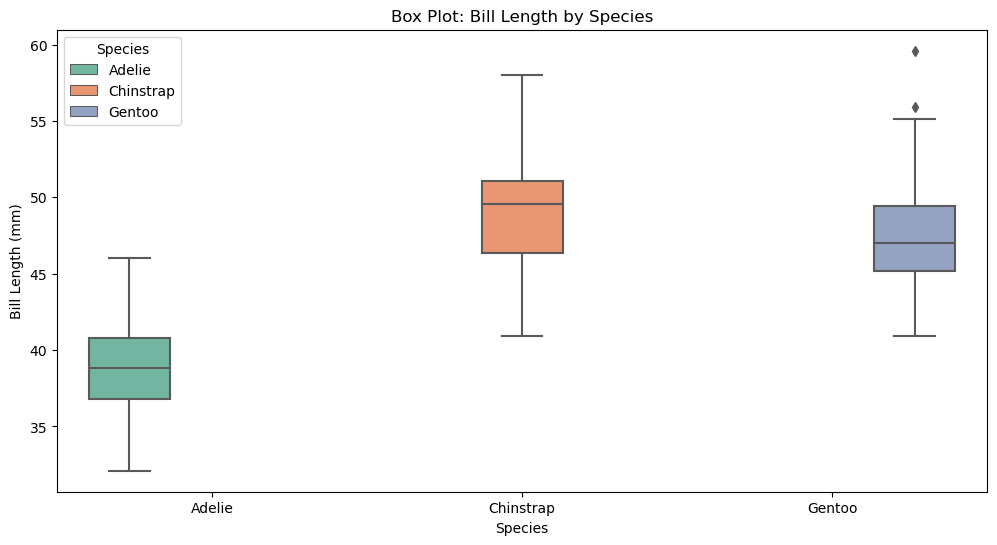

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


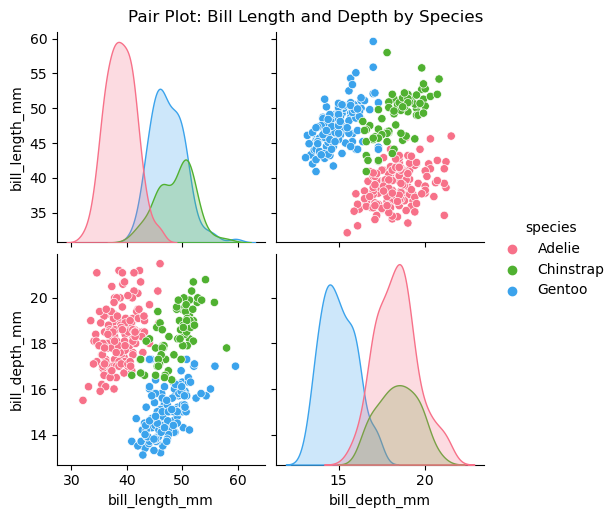

In [45]:
# Q.NO 6) Seven types of visualization graph of Bill Length vs Bill Depth
#SEVEN TYPES OF VISUALIZATION IS PERFORMED USING SEABORN AND MATPLOTLIB.PYPLOT PACKAGES
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Scatter Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend(title='Species')
plt.show()

# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(dataset['bill_length_mm'], dataset['bill_depth_mm'], gridsize=30, cmap='YlOrRd')
plt.colorbar(label='Frequency')
plt.title('Hexbin Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Density Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=dataset, x='bill_length_mm', y='bill_depth_mm', hue='species', fill=True, alpha=0.5)
plt.title('Density Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Joint Plot
sns.jointplot(data=dataset, x='bill_length_mm', y='bill_depth_mm', hue='species', kind='scatter', height=8)
plt.suptitle('Joint Plot: Bill Length vs Bill Depth', y=1.02)
plt.show()

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=dataset, x='species', y='bill_depth_mm', hue='species', palette='Set3')
plt.title('Violin Plot: Bill Depth by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')
plt.legend(title='Species')
plt.show()

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x='species', y='bill_length_mm', hue='species', palette='Set2')
plt.title('Box Plot: Bill Length by Species')
plt.xlabel('Species')
plt.ylabel('Bill Length (mm)')
plt.legend(title='Species')
plt.show()

# Pair Plot
sns.pairplot(dataset, vars=['bill_length_mm', 'bill_depth_mm'], hue='species', height=2.5, palette='husl')
plt.suptitle('Pair Plot: Bill Length and Depth by Species', y=1.02)
plt.show()


In [46]:
# Q.NO 7) Finding out the maximum flipper_length_mm for each species and island & finding out the species with the longest flippers on each island. 
#THE DATA IS GROUPED BY SPECIES AND ISLAND AND THE MAXIMUM VALUE OF flipper_length_mm FOR EACH ISLAND IS CALCULATED USING max() FUNCTION
#SPECIES WITH LONGEST FLIPPER IS FOUND OUT USING THE VALUE OF max_flipper_length WHICH IS COMPUTED IN THE PREVIOUS STEP.
max_flipper_length = dataset.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
print("Maximum flipper length for each species and island:")
print(max_flipper_length)
longest_flippers = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]
print("\nSpecies with the longest flippers on each island:")
print(longest_flippers)

Maximum flipper length for each species and island:
     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap     Biscoe                NaN
4  Chinstrap      Dream              212.0
5  Chinstrap  Torgersen                NaN
6     Gentoo     Biscoe              231.0
7     Gentoo      Dream                NaN
8     Gentoo  Torgersen                NaN

Species with the longest flippers on each island:
     species     island  flipper_length_mm
6     Gentoo     Biscoe              231.0
4  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


In [48]:
# Q.NO 8)Performing Z-score normalization
# ONLY NUMERICAL FEATURES ARE SELECTED AND BY USING StandardScaler() Z-SCORE NORMALIZATION IS PERFORMED
#FORMULA : Z=(ORIGINAL VALUE-MEAN OF THE FEATURE)/STANDARD DEVIATION OF THE FEATURE
from sklearn.preprocessing import StandardScaler
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
dataset_cleaned = dataset[numerical_cols].dropna()
scaler = StandardScaler()
normalized_data = scaler.fit_transform(dataset_cleaned)
normalized_df = pd.DataFrame(normalized_data, columns=numerical_cols)
print("Normalized Dataset (First 5 Rows):")
print(normalized_df.head())
for col in numerical_cols:
    dataset[f'{col}_zscore'] = scaler.fit_transform(dataset[[col]])


Normalized Dataset (First 5 Rows):
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.883054       0.787289          -1.420541    -0.468990
1       -0.809180       0.126114          -1.063485    -0.424125
2       -0.661432       0.431272          -0.420786    -0.917634
3        0.040373       0.075255          -0.277964    -0.199803
4       -1.326299       1.092447          -0.563608    -0.738176
